In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
df1= pd.read_csv('../data/final/FINAL_BIKE_DATA.csv')
df2 = pd.read_csv('../data/final/cleaned_traffic_index.csv')
df3 = pd.read_csv('../data/final/cleaned_aggregated_weather.csv')
df4 = pd.read_csv('../data/final/cleaned_gasprice.csv')
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(596088, 16)
(974, 7)
(1186, 12)
(1096, 2)


In [4]:
df1

,start_station_id,date,start_station_name,start_lat,start_lng,start_neighborhood,start_borough,city,dayofweek,weekofyear,month,year,ride_count_outflow,nts_rco_T,boro_rco_T,city_rco_T
0,3460.01,2020-02-15,2 Ave & 36 St,40.657089,-74.008702,Sunset Park West,Brooklyn,nyc,6.0,7.0,2.0,2020.0,6.0,6.0,3388.0,12853.0
1,3651.04,2020-02-15,West Drive & Prospect Park West,40.661063,-73.979453,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5.0,7.0,2.0,2020.0,28.0,129.0,3388.0,12853.0
2,3722.04,2020-02-15,Prospect Park West & 8 St,40.665147,-73.976376,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5.0,7.0,2.0,2020.0,11.0,129.0,3388.0,12853.0
3,3865.05,2020-02-15,3 St & Prospect Park West,40.668132,-73.973638,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5.0,7.0,2.0,2020.0,24.0,129.0,3388.0,12853.0
4,3928.08,2020-02-15,Eastern Pkwy & Washington Ave,40.671649,-73.963115,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5.0,7.0,2.0,2020.0,23.0,129.0,3388.0,12853.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596083,7735.23,2022-10-15,E 128 St & Madison Ave,40.807560,-73.939182,Central Harlem North-Polo Grounds,Manhattan,nyc,5.0,41.0,10.0,2022.0,36.0,212.0,36484.0,56708.0
596084,7756.10,2022-10-15,St. Nicholas Ave & W 126 St,40.811432,-73.951878,Central Harlem North-Polo Grounds,Manhattan,nyc,5.0,41.0,10.0,2022.0,140.0,212.0,36484.0,56708.0
596085,7795.09,2022-10-15,Frederick Douglass Blvd & W 129 St,40.812551,-73.949229,Central Harlem North-Polo Grounds,Manhattan,nyc,5.0,41.0,10.0,2022.0,36.0,212.0,36484.0,56708.0
596086,7818.17,2022-10-15,W 129 St & Convent Ave,40.814394,-73.953247,Manhattanville,Manhattan,nyc,5.0,41.0,10.0,2022.0,19.0,127.0,36484.0,56708.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596088 entries, 0 to 596087
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_station_id    596088 non-null  float64
 1   date                596088 non-null  object 
 2   start_station_name  596088 non-null  object 
 3   start_lat           596088 non-null  float64
 4   start_lng           596088 non-null  float64
 5   start_neighborhood  596088 non-null  object 
 6   start_borough       596088 non-null  object 
 7   city                596088 non-null  object 
 8   dayofweek           596088 non-null  float64
 9   weekofyear          596088 non-null  float64
 10  month               596088 non-null  float64
 11  year                596088 non-null  float64
 12  ride_count_outflow  596088 non-null  float64
 13  nts_rco_T           596088 non-null  float64
 14  boro_rco_T          596088 non-null  float64
 15  city_rco_T          596088 non-nul

In [11]:
df1.columns

Index(['start_station_id', 'date', 'start_station_name', 'start_lat',
       'start_lng', 'start_neighborhood', 'start_borough', 'city', 'dayofweek',
       'weekofyear', 'month', 'year', 'ride_count_outflow', 'nts_rco_T',
       'boro_rco_T', 'city_rco_T'],
      dtype='object')

In [12]:
for i in ['dayofweek',
       'weekofyear', 'month', 'year', 'ride_count_outflow', 'nts_rco_T',
       'boro_rco_T', 'city_rco_T']:
    df1[i]= df1[i].astype('int64')

In [7]:
df2.columns

Index(['date', 'retail_n_recreation', 'grocery_n_pharma', 'parks',
       'transit_stations', 'workplaces', 'residential'],
      dtype='object')

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 974 non-null    datetime64[ns]
 1   retail_n_recreation  974 non-null    float64       
 2   grocery_n_pharma     974 non-null    float64       
 3   parks                974 non-null    float64       
 4   transit_stations     974 non-null    float64       
 5   workplaces           974 non-null    float64       
 6   residential          974 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 53.4 KB


In [14]:
df2

,date,retail_n_recreation,grocery_n_pharma,parks,transit_stations,workplaces,residential
0,2020-02-15,3.0,-4.0,-2.0,-4.0,1.0,0.0
1,2020-02-16,7.0,-3.0,13.0,0.0,0.0,-1.0
2,2020-02-17,7.0,-2.0,23.0,-22.0,-37.0,9.0
3,2020-02-18,-2.0,-5.0,-4.0,-5.0,-10.0,3.0
4,2020-02-19,3.0,-2.0,11.0,-3.0,-9.0,2.0
...,...,...,...,...,...,...,...
969,2022-10-11,-18.0,-7.0,29.0,-26.0,-28.0,4.0
970,2022-10-12,-16.0,-5.0,31.0,-25.0,-26.0,4.0
971,2022-10-13,-20.0,-10.0,-5.0,-28.0,-26.0,5.0
972,2022-10-14,-16.0,-6.0,18.0,-26.0,-26.0,4.0


In [15]:
df2.describe()

,retail_n_recreation,grocery_n_pharma,parks,transit_stations,workplaces,residential
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,-21.735113,-6.412731,23.040041,-37.218686,-30.779261,8.240246
std,13.933687,8.961037,43.533893,13.498750,13.707094,6.331197
min,-83.000000,-63.000000,-64.000000,-76.000000,-81.000000,-4.000000
25%,-27.000000,-10.000000,-12.000000,-46.000000,-38.000000,4.000000
50%,-19.000000,-6.000000,20.000000,-36.000000,-33.000000,7.000000
75%,-13.000000,-2.000000,52.000000,-29.000000,-19.000000,12.000000
max,10.000000,31.000000,180.000000,3.000000,6.000000,32.000000


In [16]:
for i in ['retail_n_recreation', 'grocery_n_pharma', 'parks',
       'transit_stations', 'workplaces', 'residential']:
    df2[i]= df2[i].astype('int64')

df2.describe()

,retail_n_recreation,grocery_n_pharma,parks,transit_stations,workplaces,residential
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,-21.735113,-6.412731,23.040041,-37.218686,-30.779261,8.240246
std,13.933687,8.961037,43.533893,13.498750,13.707094,6.331197
min,-83.000000,-63.000000,-64.000000,-76.000000,-81.000000,-4.000000
25%,-27.000000,-10.000000,-12.000000,-46.000000,-38.000000,4.000000
50%,-19.000000,-6.000000,20.000000,-36.000000,-33.000000,7.000000
75%,-13.000000,-2.000000,52.000000,-29.000000,-19.000000,12.000000
max,10.000000,31.000000,180.000000,3.000000,6.000000,32.000000


In [8]:
df3.columns

Index(['date', 'day_condition', 'temp_min', 'temp_max', 'temp_mean',
       'precipprob_max', 'visibility_min', 'visibility_max', 'visibility_mean',
       'uvindex_min', 'uvindex_max', 'uvindex_mean'],
      dtype='object')

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1186 non-null   datetime64[ns]
 1   day_condition    1186 non-null   object        
 2   temp_min         1186 non-null   float64       
 3   temp_max         1186 non-null   float64       
 4   temp_mean        1186 non-null   float64       
 5   precipprob_max   1186 non-null   float64       
 6   visibility_min   1186 non-null   float64       
 7   visibility_max   1186 non-null   float64       
 8   visibility_mean  1186 non-null   float64       
 9   uvindex_min      1186 non-null   int64         
 10  uvindex_max      1186 non-null   int64         
 11  uvindex_mean     1186 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 111.3+ KB


In [19]:
df3.corr()

,temp_min,temp_max,temp_mean,precipprob_max,visibility_min,visibility_max,visibility_mean,uvindex_min,uvindex_max,uvindex_mean
temp_min,1.000000,0.955665,0.987108,0.098720,0.040704,0.047211,0.120755,NaN,0.462685,0.482166
temp_max,0.955665,1.000000,0.987059,0.047622,0.105663,0.058397,0.185751,NaN,0.589459,0.612901
temp_mean,0.987108,0.987059,1.000000,0.075935,0.074903,0.051121,0.154370,NaN,0.524574,0.548563
precipprob_max,0.098720,0.047622,0.075935,1.000000,-0.507174,-0.051729,-0.372078,NaN,-0.235385,-0.249511
visibility_min,0.040704,0.105663,0.074903,-0.507174,1.000000,0.111875,0.798245,NaN,0.447222,0.442094
visibility_max,0.047211,0.058397,0.051121,-0.051729,0.111875,1.000000,0.313264,NaN,0.083153,0.075297
visibility_mean,0.120755,0.185751,0.154370,-0.372078,0.798245,0.313264,1.000000,NaN,0.468975,0.431370
uvindex_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uvindex_max,0.462685,0.589459,0.524574,-0.235385,0.447222,0.083153,0.468975,NaN,1.000000,0.939213
uvindex_mean,0.482166,0.612901,0.548563,-0.249511,0.442094,0.075297,0.431370,NaN,0.939213,1.000000


In [20]:
df3.drop(columns=['temp_min', 'temp_max', 'visibility_min', 'visibility_max', 'uvindex_min', 'uvindex_max'], inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1186 non-null   datetime64[ns]
 1   day_condition    1186 non-null   object        
 2   temp_mean        1186 non-null   float64       
 3   precipprob_max   1186 non-null   float64       
 4   visibility_mean  1186 non-null   float64       
 5   uvindex_mean     1186 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 55.7+ KB


In [21]:
df3

,date,day_condition,temp_mean,precipprob_max,visibility_mean,uvindex_mean
0,2020-01-01,Overcast,38.462500,1.0,9.900000,0.416667
1,2020-01-02,Clear,40.587500,1.0,9.900000,0.833333
2,2020-01-03,Overcast,45.737500,1.0,7.733333,0.166667
3,2020-01-04,Overcast,46.850000,1.0,5.279167,0.125000
4,2020-01-05,Partially cloudy,40.245833,0.0,9.900000,0.875000
...,...,...,...,...,...,...
1181,2023-03-27,Clear,50.579167,1.0,9.879167,1.500000
1182,2023-03-28,Overcast,47.175000,0.0,9.900000,1.375000
1183,2023-03-29,Clear,46.695833,0.0,9.900000,2.541667
1184,2023-03-30,Clear,41.091667,1.0,9.900000,2.666667


In [23]:
df3.columns=['date', 'day_condition', 'temp_mean', 'precip',
       'visibility_mean', 'uvindex_mean']

In [26]:
df3= df3.round(2)
df3['precip']= df3['precip'].astype('int64')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             1186 non-null   datetime64[ns]
 1   day_condition    1186 non-null   object        
 2   temp_mean        1186 non-null   float64       
 3   precip           1186 non-null   int64         
 4   visibility_mean  1186 non-null   float64       
 5   uvindex_mean     1186 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 55.7+ KB


In [27]:
df4.columns

Index(['date', 'nyc_gasprice_avg'], dtype='object')

In [28]:
df4

,date,nyc_gasprice_avg
0,2020-01-01,2.77
1,2020-01-02,2.77
2,2020-01-03,2.77
3,2020-01-04,2.77
4,2020-01-05,2.77
...,...,...
1091,2022-12-27,3.50
1092,2022-12-28,3.50
1093,2022-12-29,3.50
1094,2022-12-30,3.50


In [10]:
df1['date']= df1['date'].astype('datetime64[ns]')
df2['date']= df2['date'].astype('datetime64[ns]')
df3['date']= df3['date'].astype('datetime64[ns]')
df4['date']= df4['date'].astype('datetime64[ns]')

In [32]:
pd.merge(df1, df2).merge(df3).merge(df4)

,start_station_id,date,start_station_name,start_lat,start_lng,start_neighborhood,start_borough,city,dayofweek,weekofyear,...,parks,transit_stations,workplaces,residential,day_condition,temp_mean,precip,visibility_mean,uvindex_mean,nyc_gasprice_avg
0,3460.01,2020-02-15,2 Ave & 36 St,40.657089,-74.008702,Sunset Park West,Brooklyn,nyc,6,7,...,-2,-4,1,0,Clear,25.62,0,9.9,1.54,2.70
1,3651.04,2020-02-15,West Drive & Prospect Park West,40.661063,-73.979453,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,7,...,-2,-4,1,0,Clear,25.62,0,9.9,1.54,2.70
2,3722.04,2020-02-15,Prospect Park West & 8 St,40.665147,-73.976376,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,7,...,-2,-4,1,0,Clear,25.62,0,9.9,1.54,2.70
3,3865.05,2020-02-15,3 St & Prospect Park West,40.668132,-73.973638,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,7,...,-2,-4,1,0,Clear,25.62,0,9.9,1.54,2.70
4,3928.08,2020-02-15,Eastern Pkwy & Washington Ave,40.671649,-73.963115,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,7,...,-2,-4,1,0,Clear,25.62,0,9.9,1.54,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596083,7735.23,2022-10-15,E 128 St & Madison Ave,40.807560,-73.939182,Central Harlem North-Polo Grounds,Manhattan,nyc,5,41,...,66,-17,-12,-1,Clear,59.74,0,9.9,1.33,3.56
596084,7756.10,2022-10-15,St. Nicholas Ave & W 126 St,40.811432,-73.951878,Central Harlem North-Polo Grounds,Manhattan,nyc,5,41,...,66,-17,-12,-1,Clear,59.74,0,9.9,1.33,3.56
596085,7795.09,2022-10-15,Frederick Douglass Blvd & W 129 St,40.812551,-73.949229,Central Harlem North-Polo Grounds,Manhattan,nyc,5,41,...,66,-17,-12,-1,Clear,59.74,0,9.9,1.33,3.56
596086,7818.17,2022-10-15,W 129 St & Convent Ave,40.814394,-73.953247,Manhattanville,Manhattan,nyc,5,41,...,66,-17,-12,-1,Clear,59.74,0,9.9,1.33,3.56


In [33]:
df= pd.merge(df1, df2).merge(df3).merge(df4)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596088 entries, 0 to 596087
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   start_station_id     596088 non-null  float64       
 1   date                 596088 non-null  datetime64[ns]
 2   start_station_name   596088 non-null  object        
 3   start_lat            596088 non-null  float64       
 4   start_lng            596088 non-null  float64       
 5   start_neighborhood   596088 non-null  object        
 6   start_borough        596088 non-null  object        
 7   city                 596088 non-null  object        
 8   dayofweek            596088 non-null  int64         
 9   weekofyear           596088 non-null  int64         
 10  month                596088 non-null  int64         
 11  year                 596088 non-null  int64         
 12  ride_count_outflow   596088 non-null  int64         
 13  nts_rco_T     

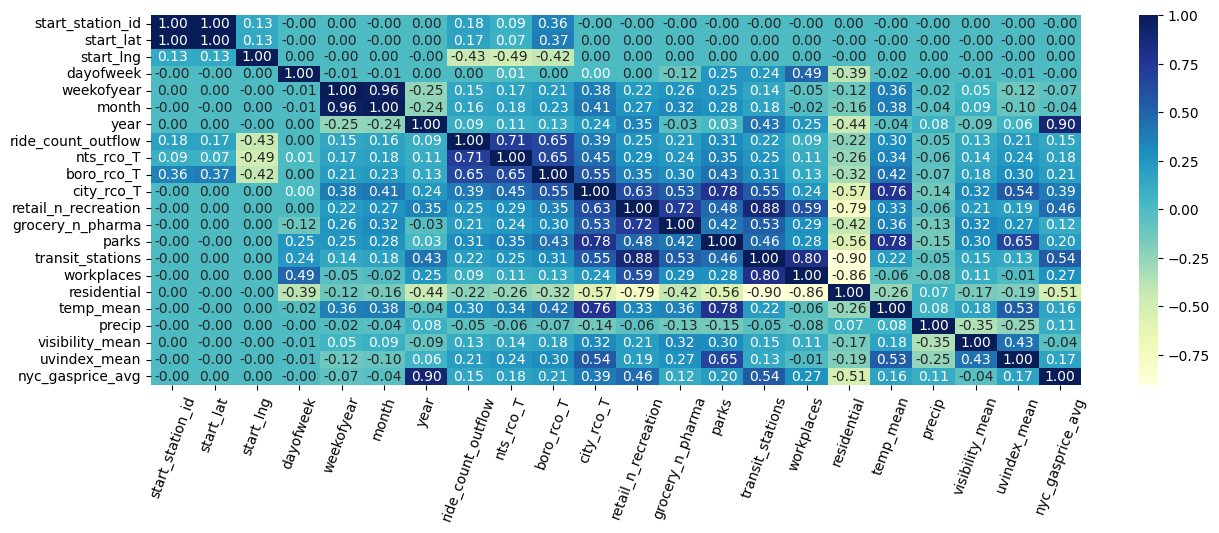

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure().set_figwidth(15)
hm= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [35]:
df.columns

Index(['start_station_id', 'date', 'start_station_name', 'start_lat',
       'start_lng', 'start_neighborhood', 'start_borough', 'city', 'dayofweek',
       'weekofyear', 'month', 'year', 'ride_count_outflow', 'nts_rco_T',
       'boro_rco_T', 'city_rco_T', 'retail_n_recreation', 'grocery_n_pharma',
       'parks', 'transit_stations', 'workplaces', 'residential',
       'day_condition', 'temp_mean', 'precip', 'visibility_mean',
       'uvindex_mean', 'nyc_gasprice_avg'],
      dtype='object')

In [41]:
df['start_neighborhood']= df['start_neighborhood'].astype('category')
df['start_borough']= df['start_borough'].astype('category')
df['city']= df['city'].astype('category')

# ANOVA

Feature 0: 1.217748
Feature 1: 38.370893
Feature 2: 47.624689
Feature 3: 15.247463
Feature 4: 127.514081
Feature 5: 104.498930
Feature 6: 177.931311
Feature 7: 84.620155
Feature 8: 18.103738
Feature 9: 96.986987
Feature 10: 167.273470
Feature 11: 6.597526
Feature 12: 47.148083
Feature 13: 80.701918
Feature 14: 38.635192


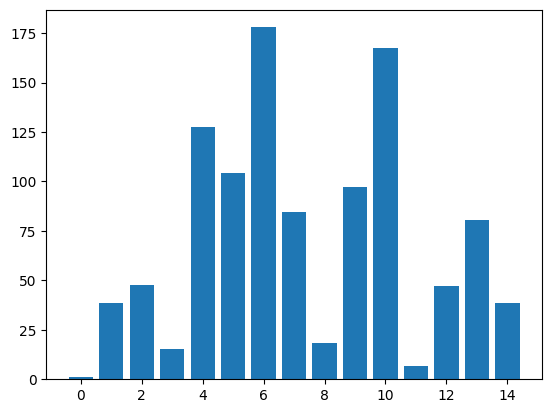

In [45]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df[['dayofweek', 'weekofyear', 'month', 'year', 
       'retail_n_recreation', 'grocery_n_pharma', 'parks', 'transit_stations', 'workplaces', 'residential',
       'temp_mean', 'precip', 'visibility_mean', 'uvindex_mean', 'nyc_gasprice_avg']]
y = df['ride_count_outflow']

# Apply ANOVA feature selection
fs_anova = SelectKBest(score_func=f_classif, k='all')
X_selected = fs_anova.fit_transform(X, y)

# Print scores and selected features
for i in range(len(fs_anova.scores_)):
    print('Feature %d: %f' % (i, fs_anova.scores_[i]))
    
# Plot scores
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(fs_anova.scores_))], fs_anova.scores_)
plt.show()

# LASSO

In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Load data and split into training and testing sets
X = df[['dayofweek', 'weekofyear', 'month', 'year', 
       'retail_n_recreation', 'grocery_n_pharma', 'parks', 'transit_stations', 'workplaces', 'residential',
       'temp_mean', 'precip', 'visibility_mean', 'uvindex_mean', 'nyc_gasprice_avg']]
y = df['ride_count_outflow']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Fit Lasso Regression model with cross-validation
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Evaluate model on test set
lasso_best = Lasso(alpha=grid_search.best_params_['alpha'])
lasso_best.fit(X_train, y_train)
score = lasso_best.score(X_test, y_test)
print('Test set score:', score)

Best hyperparameters: {'alpha': 0.001}
Test set score: 0.13220998555026586


In [47]:
# Fit Lasso Regression model
lasso = Lasso(alpha=0.001)  # adjust alpha to control regularization strength
lasso.fit(X, y)

# Print coefficients and selected features
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        print('Feature %d: %f' % (i, lasso.coef_[i]))

Feature 0: -0.800742
Feature 1: 0.086344
Feature 2: 1.459308
Feature 3: 13.377601
Feature 4: 0.136872
Feature 5: 0.177321
Feature 6: 0.081044
Feature 7: 0.275869
Feature 8: -0.086634
Feature 9: -0.406664
Feature 10: 0.700098
Feature 11: -3.503389
Feature 12: 1.329972
Feature 13: 4.581082
Feature 14: -7.440986


In [48]:
# Print the selected features
coef = pd.Series(lasso.coef_, index=X.columns)
selected_features = coef[coef!=0].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['dayofweek', 'weekofyear', 'month', 'year', 'retail_n_recreation', 'grocery_n_pharma', 'parks', 'transit_stations', 'workplaces', 'residential', 'temp_mean', 'precip', 'visibility_mean', 'uvindex_mean', 'nyc_gasprice_avg']


In [49]:
df.drop(columns='weekofyear', inplace=True)

# Traffic PCA

In [51]:
df2.columns

Index(['date', 'retail_n_recreation', 'grocery_n_pharma', 'parks',
       'transit_stations', 'workplaces', 'residential'],
      dtype='object')

In [52]:
# without scaled data
from sklearn.decomposition import PCA

traffic_cols=['retail_n_recreation', 'grocery_n_pharma', 'parks',
       'transit_stations', 'workplaces', 'residential']
# Initialize PCA object
pca = PCA()

# Fit and transform the correlation matrix
pca.fit(df2[traffic_cols].corr())

# Get the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
print(explained_variance_ratio.round(3))

[0.899 0.06  0.036 0.004 0.    0.   ]


In [53]:
0.899+0.06

0.9590000000000001

In [55]:
# Initialize PCA object with 2 components
pca = PCA(n_components=2)
reduced_data= pca.fit_transform(df2[traffic_cols])
reduced_data

array([[ -9.12415338, -57.08612681],
       [  6.63631086, -56.66989957],
       [  7.30798483, -19.77412965],
       ...,
       [-24.335459  , -16.74726516],
       [ -0.88825251, -13.98019519],
       [ 49.36174964, -15.87102914]])

In [56]:
df_reduced = pd.DataFrame(reduced_data, columns=["traffic_stdS_PC1", "traffic_stdS_PC2"])
df_reduced

,traffic_stdS_PC1,traffic_stdS_PC2
0,-9.124153,-57.086127
1,6.636311,-56.669900
2,7.307985,-19.774130
3,-13.739055,-47.841915
4,2.282850,-48.291831
...,...,...
969,8.910221,-8.477699
970,11.766621,-10.870390
971,-24.335459,-16.747265
972,-0.888253,-13.980195


In [57]:
df2= pd.concat([df2, df_reduced], axis=1)
df2

,date,retail_n_recreation,grocery_n_pharma,parks,transit_stations,workplaces,residential,traffic_stdS_PC1,traffic_stdS_PC2
0,2020-02-15,3,-4,-2,-4,1,0,-9.124153,-57.086127
1,2020-02-16,7,-3,13,0,0,-1,6.636311,-56.669900
2,2020-02-17,7,-2,23,-22,-37,9,7.307985,-19.774130
3,2020-02-18,-2,-5,-4,-5,-10,3,-13.739055,-47.841915
4,2020-02-19,3,-2,11,-3,-9,2,2.282850,-48.291831
...,...,...,...,...,...,...,...,...,...
969,2022-10-11,-18,-7,29,-26,-28,4,8.910221,-8.477699
970,2022-10-12,-16,-5,31,-25,-26,4,11.766621,-10.870390
971,2022-10-13,-20,-10,-5,-28,-26,5,-24.335459,-16.747265
972,2022-10-14,-16,-6,18,-26,-26,4,-0.888253,-13.980195


In [58]:
df2n= df2.drop(columns=traffic_cols)
df2n

,date,traffic_stdS_PC1,traffic_stdS_PC2
0,2020-02-15,-9.124153,-57.086127
1,2020-02-16,6.636311,-56.669900
2,2020-02-17,7.307985,-19.774130
3,2020-02-18,-13.739055,-47.841915
4,2020-02-19,2.282850,-48.291831
...,...,...,...
969,2022-10-11,8.910221,-8.477699
970,2022-10-12,11.766621,-10.870390
971,2022-10-13,-24.335459,-16.747265
972,2022-10-14,-0.888253,-13.980195


In [59]:
df= pd.merge(df, df2n)
df

,start_station_id,date,start_station_name,start_lat,start_lng,start_neighborhood,start_borough,city,dayofweek,month,...,workplaces,residential,day_condition,temp_mean,precip,visibility_mean,uvindex_mean,nyc_gasprice_avg,traffic_stdS_PC1,traffic_stdS_PC2
0,3460.01,2020-02-15,2 Ave & 36 St,40.657089,-74.008702,Sunset Park West,Brooklyn,nyc,6,2,...,1,0,Clear,25.62,0,9.9,1.54,2.70,-9.124153,-57.086127
1,3651.04,2020-02-15,West Drive & Prospect Park West,40.661063,-73.979453,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,1,0,Clear,25.62,0,9.9,1.54,2.70,-9.124153,-57.086127
2,3722.04,2020-02-15,Prospect Park West & 8 St,40.665147,-73.976376,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,1,0,Clear,25.62,0,9.9,1.54,2.70,-9.124153,-57.086127
3,3865.05,2020-02-15,3 St & Prospect Park West,40.668132,-73.973638,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,1,0,Clear,25.62,0,9.9,1.54,2.70,-9.124153,-57.086127
4,3928.08,2020-02-15,Eastern Pkwy & Washington Ave,40.671649,-73.963115,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,1,0,Clear,25.62,0,9.9,1.54,2.70,-9.124153,-57.086127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596083,7735.23,2022-10-15,E 128 St & Madison Ave,40.807560,-73.939182,Central Harlem North-Polo Grounds,Manhattan,nyc,5,10,...,-12,-1,Clear,59.74,0,9.9,1.33,3.56,49.361750,-15.871029
596084,7756.10,2022-10-15,St. Nicholas Ave & W 126 St,40.811432,-73.951878,Central Harlem North-Polo Grounds,Manhattan,nyc,5,10,...,-12,-1,Clear,59.74,0,9.9,1.33,3.56,49.361750,-15.871029
596085,7795.09,2022-10-15,Frederick Douglass Blvd & W 129 St,40.812551,-73.949229,Central Harlem North-Polo Grounds,Manhattan,nyc,5,10,...,-12,-1,Clear,59.74,0,9.9,1.33,3.56,49.361750,-15.871029
596086,7818.17,2022-10-15,W 129 St & Convent Ave,40.814394,-73.953247,Manhattanville,Manhattan,nyc,5,10,...,-12,-1,Clear,59.74,0,9.9,1.33,3.56,49.361750,-15.871029


In [62]:
df.to_csv('../data/final/MERGED_EXTERNAL_FACTORS_FINAL.csv', index=False)

In [66]:
df.columns

Index(['start_station_id', 'date', 'start_station_name', 'start_lat',
       'start_lng', 'start_neighborhood', 'start_borough', 'city', 'dayofweek',
       'month', 'year', 'ride_count_outflow', 'nts_rco_T', 'boro_rco_T',
       'city_rco_T', 'retail_n_recreation', 'grocery_n_pharma', 'parks',
       'transit_stations', 'workplaces', 'residential', 'day_condition',
       'temp_mean', 'precip', 'visibility_mean', 'uvindex_mean',
       'nyc_gasprice_avg', 'traffic_stdS_PC1', 'traffic_stdS_PC2'],
      dtype='object')

In [65]:
df.groupby('start_station_id')['ride_count_outflow'].sum().sort_values()

start_station_id
4013.08      4383
4765.07      4514
4921.04      4623
5241.02      4759
6237.01      4858
            ...  
5905.12    239681
6765.01    243477
6822.09    284236
5329.03    293520
6140.05    311493
Name: ride_count_outflow, Length: 612, dtype: int64

In [67]:
df.groupby('start_station_name')['ride_count_outflow'].sum().sort_values()

start_station_name
Columbia St & Lorraine St               4383
Cypress Ave & George St                 4514
Cypress Ave & Palmetto St               4623
Metropolitan Ave & Vandervoort Ave      4759
47 Ave & Skillman Ave                   4858
                                       ...  
Broadway & E 14 St                    239681
12 Ave & W 40 St                      243477
1 Ave & E 68 St                       284236
West St & Chambers St                 293520
W 21 St & 6 Ave                       311493
Name: ride_count_outflow, Length: 612, dtype: int64

In [71]:
df[['date', 'start_neighborhood', 'nts_rco_T']].drop_duplicates().groupby('start_neighborhood')['nts_rco_T'].sum().sort_values()

start_neighborhood
Sunset Park West                                      14490
Prospect Lefferts Gardens-Wingate                     32692
Ocean Hill                                            53497
Williamsburg                                          57553
park-cemetery-etc-Queens                              68520
Crown Heights South                                   72029
Manhattanville                                        83799
Gramercy                                              90980
Central Harlem North-Polo Grounds                    113450
Ridgewood                                            152902
Stuyvesant Heights                                   170272
Steinway                                             189397
Stuyvesant Town-Cooper Village                       205523
Old Astoria                                          205867
Prospect Heights                                     272487
Queensbridge-Ravenswood-Long Island City             313390
Bushwick North       

In [73]:
df[['date', 'start_borough', 'boro_rco_T']].drop_duplicates().groupby('start_borough')['boro_rco_T'].sum().sort_values()

start_borough
Queens        2038165
Brooklyn      9626590
Manhattan    25065738
Name: boro_rco_T, dtype: int64

In [74]:
df[['date', 'city', 'city_rco_T']].drop_duplicates().groupby('city')['city_rco_T'].sum().sort_values()

city
nyc    36730493
Name: city_rco_T, dtype: int64

In [75]:
df

,start_station_id,date,start_station_name,start_lat,start_lng,start_neighborhood,start_borough,city,dayofweek,month,...,workplaces,residential,day_condition,temp_mean,precip,visibility_mean,uvindex_mean,nyc_gasprice_avg,traffic_stdS_PC1,traffic_stdS_PC2
0,3460.01,2020-02-15,2 Ave & 36 St,40.657089,-74.008702,Sunset Park West,Brooklyn,nyc,6,2,...,1,0,Clear,25.62,0,9.9,1.54,2.70,-9.124153,-57.086127
1,3651.04,2020-02-15,West Drive & Prospect Park West,40.661063,-73.979453,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,1,0,Clear,25.62,0,9.9,1.54,2.70,-9.124153,-57.086127
2,3722.04,2020-02-15,Prospect Park West & 8 St,40.665147,-73.976376,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,1,0,Clear,25.62,0,9.9,1.54,2.70,-9.124153,-57.086127
3,3865.05,2020-02-15,3 St & Prospect Park West,40.668132,-73.973638,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,1,0,Clear,25.62,0,9.9,1.54,2.70,-9.124153,-57.086127
4,3928.08,2020-02-15,Eastern Pkwy & Washington Ave,40.671649,-73.963115,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,1,0,Clear,25.62,0,9.9,1.54,2.70,-9.124153,-57.086127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596083,7735.23,2022-10-15,E 128 St & Madison Ave,40.807560,-73.939182,Central Harlem North-Polo Grounds,Manhattan,nyc,5,10,...,-12,-1,Clear,59.74,0,9.9,1.33,3.56,49.361750,-15.871029
596084,7756.10,2022-10-15,St. Nicholas Ave & W 126 St,40.811432,-73.951878,Central Harlem North-Polo Grounds,Manhattan,nyc,5,10,...,-12,-1,Clear,59.74,0,9.9,1.33,3.56,49.361750,-15.871029
596085,7795.09,2022-10-15,Frederick Douglass Blvd & W 129 St,40.812551,-73.949229,Central Harlem North-Polo Grounds,Manhattan,nyc,5,10,...,-12,-1,Clear,59.74,0,9.9,1.33,3.56,49.361750,-15.871029
596086,7818.17,2022-10-15,W 129 St & Convent Ave,40.814394,-73.953247,Manhattanville,Manhattan,nyc,5,10,...,-12,-1,Clear,59.74,0,9.9,1.33,3.56,49.361750,-15.871029


In [76]:
df.columns

Index(['start_station_id', 'date', 'start_station_name', 'start_lat',
       'start_lng', 'start_neighborhood', 'start_borough', 'city', 'dayofweek',
       'month', 'year', 'ride_count_outflow', 'nts_rco_T', 'boro_rco_T',
       'city_rco_T', 'retail_n_recreation', 'grocery_n_pharma', 'parks',
       'transit_stations', 'workplaces', 'residential', 'day_condition',
       'temp_mean', 'precip', 'visibility_mean', 'uvindex_mean',
       'nyc_gasprice_avg', 'traffic_stdS_PC1', 'traffic_stdS_PC2'],
      dtype='object')

In [77]:
df= df[['date', 'start_station_id', 'start_station_name', 'start_lat', 'start_lng', 'start_neighborhood', 'start_borough', 'city', 
        'dayofweek', 'month', 'year', 
        'day_condition', 'temp_mean', 'precip', 'visibility_mean', 'uvindex_mean',
        'nyc_gasprice_avg',
        'traffic_stdS_PC1', 'traffic_stdS_PC2',
        'ride_count_outflow', 'nts_rco_T', 'boro_rco_T', 'city_rco_T']]

df.reset_index(inplace=True, drop=True)
df

,date,start_station_id,start_station_name,start_lat,start_lng,start_neighborhood,start_borough,city,dayofweek,month,...,precip,visibility_mean,uvindex_mean,nyc_gasprice_avg,traffic_stdS_PC1,traffic_stdS_PC2,ride_count_outflow,nts_rco_T,boro_rco_T,city_rco_T
0,2020-02-15,3460.01,2 Ave & 36 St,40.657089,-74.008702,Sunset Park West,Brooklyn,nyc,6,2,...,0,9.9,1.54,2.70,-9.124153,-57.086127,6,6,3388,12853
1,2020-02-15,3651.04,West Drive & Prospect Park West,40.661063,-73.979453,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,0,9.9,1.54,2.70,-9.124153,-57.086127,28,129,3388,12853
2,2020-02-15,3722.04,Prospect Park West & 8 St,40.665147,-73.976376,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,0,9.9,1.54,2.70,-9.124153,-57.086127,11,129,3388,12853
3,2020-02-15,3865.05,3 St & Prospect Park West,40.668132,-73.973638,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,0,9.9,1.54,2.70,-9.124153,-57.086127,24,129,3388,12853
4,2020-02-15,3928.08,Eastern Pkwy & Washington Ave,40.671649,-73.963115,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,0,9.9,1.54,2.70,-9.124153,-57.086127,23,129,3388,12853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596083,2022-10-15,7735.23,E 128 St & Madison Ave,40.807560,-73.939182,Central Harlem North-Polo Grounds,Manhattan,nyc,5,10,...,0,9.9,1.33,3.56,49.361750,-15.871029,36,212,36484,56708
596084,2022-10-15,7756.10,St. Nicholas Ave & W 126 St,40.811432,-73.951878,Central Harlem North-Polo Grounds,Manhattan,nyc,5,10,...,0,9.9,1.33,3.56,49.361750,-15.871029,140,212,36484,56708
596085,2022-10-15,7795.09,Frederick Douglass Blvd & W 129 St,40.812551,-73.949229,Central Harlem North-Polo Grounds,Manhattan,nyc,5,10,...,0,9.9,1.33,3.56,49.361750,-15.871029,36,212,36484,56708
596086,2022-10-15,7818.17,W 129 St & Convent Ave,40.814394,-73.953247,Manhattanville,Manhattan,nyc,5,10,...,0,9.9,1.33,3.56,49.361750,-15.871029,19,127,36484,56708


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596088 entries, 0 to 596087
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                596088 non-null  datetime64[ns]
 1   start_station_id    596088 non-null  float64       
 2   start_station_name  596088 non-null  object        
 3   start_lat           596088 non-null  float64       
 4   start_lng           596088 non-null  float64       
 5   start_neighborhood  596088 non-null  category      
 6   start_borough       596088 non-null  category      
 7   city                596088 non-null  category      
 8   dayofweek           596088 non-null  int64         
 9   month               596088 non-null  int64         
 10  year                596088 non-null  int64         
 11  day_condition       596088 non-null  object        
 12  temp_mean           596088 non-null  float64       
 13  precip              596088 no

In [79]:
df['day_condition'].value_counts()

Clear               327420
Overcast            138924
Partially cloudy    102204
Rain                 24480
Snow                  3060
Name: day_condition, dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
le = LabelEncoder()

df['day_condition'+'_le']= le.fit_transform(df['day_condition'].astype(str))

df.head()

C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\15\ipykernel_11384\3494029025.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_condition'+'_le']= le.fit_transform(df['day_condition'].astype(str))


,date,start_station_id,start_station_name,start_lat,start_lng,start_neighborhood,start_borough,city,dayofweek,month,...,visibility_mean,uvindex_mean,nyc_gasprice_avg,traffic_stdS_PC1,traffic_stdS_PC2,ride_count_outflow,nts_rco_T,boro_rco_T,city_rco_T,day_condition_le
0,2020-02-15,3460.01,2 Ave & 36 St,40.657089,-74.008702,Sunset Park West,Brooklyn,nyc,6,2,...,9.9,1.54,2.7,-9.124153,-57.086127,6,6,3388,12853,0
1,2020-02-15,3651.04,West Drive & Prospect Park West,40.661063,-73.979453,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,9.9,1.54,2.7,-9.124153,-57.086127,28,129,3388,12853,0
2,2020-02-15,3722.04,Prospect Park West & 8 St,40.665147,-73.976376,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,9.9,1.54,2.7,-9.124153,-57.086127,11,129,3388,12853,0
3,2020-02-15,3865.05,3 St & Prospect Park West,40.668132,-73.973638,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,9.9,1.54,2.7,-9.124153,-57.086127,24,129,3388,12853,0
4,2020-02-15,3928.08,Eastern Pkwy & Washington Ave,40.671649,-73.963115,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,9.9,1.54,2.7,-9.124153,-57.086127,23,129,3388,12853,0


In [81]:
df['day_condition_le'].value_counts()

0    327420
1    138924
2    102204
3     24480
4      3060
Name: day_condition_le, dtype: int64

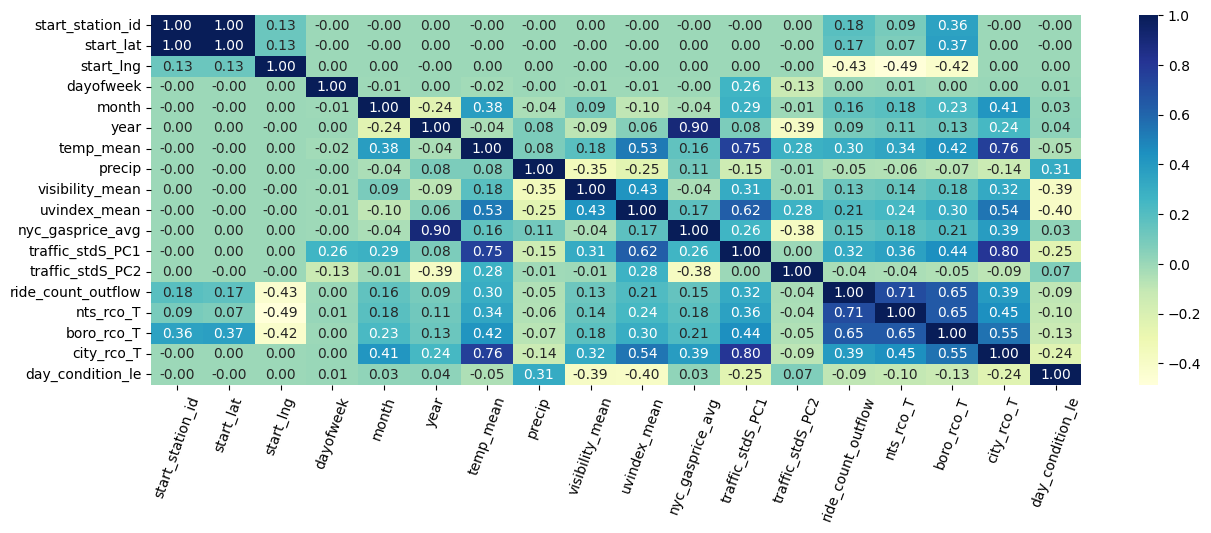

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure().set_figwidth(15)
hm= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt='.2f')
hm.set_xticklabels(hm.get_xticklabels(), rotation=70)
plt.show()

In [83]:
df.columns

Index(['date', 'start_station_id', 'start_station_name', 'start_lat',
       'start_lng', 'start_neighborhood', 'start_borough', 'city', 'dayofweek',
       'month', 'year', 'day_condition', 'temp_mean', 'precip',
       'visibility_mean', 'uvindex_mean', 'nyc_gasprice_avg',
       'traffic_stdS_PC1', 'traffic_stdS_PC2', 'ride_count_outflow',
       'nts_rco_T', 'boro_rco_T', 'city_rco_T', 'day_condition_le'],
      dtype='object')

In [85]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Load data and split into training and testing sets
X = df[['dayofweek', 'month', 'year', 'day_condition_le', 'temp_mean', 'precip',
       'visibility_mean', 'uvindex_mean', 'nyc_gasprice_avg',
       'traffic_stdS_PC1', 'traffic_stdS_PC2']]
y = df['ride_count_outflow']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Fit Lasso Regression model with cross-validation
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'alpha': 0.0001}


In [86]:
# Evaluate model on test set
lasso_best = Lasso(alpha=grid_search.best_params_['alpha'])
lasso_best.fit(X_train, y_train)
score = lasso_best.score(X_test, y_test)
print('Test set score:', score)
# Fit Lasso Regression model
lasso = Lasso(alpha=0.001)  # adjust alpha to control regularization strength
lasso.fit(X, y)

Test set score: 0.1319167306375172


Lasso(alpha=0.001)

In [87]:
# Print coefficients and selected features
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        print('Feature %d: %f' % (i, lasso.coef_[i]))

Feature 0: -1.158940
Feature 1: 2.006466
Feature 2: 13.882977
Feature 3: -1.210724
Feature 4: 0.746872
Feature 5: -3.231709
Feature 6: 1.225875
Feature 7: 4.207581
Feature 8: -6.946610
Feature 9: 0.176633
Feature 10: -0.255168


In [88]:
# Print the selected features
coef = pd.Series(lasso.coef_, index=X.columns)
selected_features = coef[coef!=0].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['dayofweek', 'month', 'year', 'day_condition_le', 'temp_mean', 'precip', 'visibility_mean', 'uvindex_mean', 'nyc_gasprice_avg', 'traffic_stdS_PC1', 'traffic_stdS_PC2']


In [89]:
df.columns

Index(['date', 'start_station_id', 'start_station_name', 'start_lat',
       'start_lng', 'start_neighborhood', 'start_borough', 'city', 'dayofweek',
       'month', 'year', 'day_condition', 'temp_mean', 'precip',
       'visibility_mean', 'uvindex_mean', 'nyc_gasprice_avg',
       'traffic_stdS_PC1', 'traffic_stdS_PC2', 'ride_count_outflow',
       'nts_rco_T', 'boro_rco_T', 'city_rco_T', 'day_condition_le'],
      dtype='object')

In [90]:
df[['day_condition', 'day_condition_le']].drop_duplicates()

,day_condition,day_condition_le
0,Clear,0
1836,Overcast,1
7344,Partially cloudy,2
22644,Rain,3
187272,Snow,4


In [91]:
df= df[['date', 'start_station_id', 'start_station_name', 'start_lat',
       'start_lng', 'start_neighborhood', 'start_borough', 'city', 'dayofweek',
       'month', 'year', 'day_condition_le', 'temp_mean', 'precip',
       'visibility_mean', 'uvindex_mean', 'nyc_gasprice_avg',
       'traffic_stdS_PC1', 'traffic_stdS_PC2', 'ride_count_outflow',
       'nts_rco_T', 'boro_rco_T', 'city_rco_T']]

df

,date,start_station_id,start_station_name,start_lat,start_lng,start_neighborhood,start_borough,city,dayofweek,month,...,precip,visibility_mean,uvindex_mean,nyc_gasprice_avg,traffic_stdS_PC1,traffic_stdS_PC2,ride_count_outflow,nts_rco_T,boro_rco_T,city_rco_T
0,2020-02-15,3460.01,2 Ave & 36 St,40.657089,-74.008702,Sunset Park West,Brooklyn,nyc,6,2,...,0,9.9,1.54,2.70,-9.124153,-57.086127,6,6,3388,12853
1,2020-02-15,3651.04,West Drive & Prospect Park West,40.661063,-73.979453,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,0,9.9,1.54,2.70,-9.124153,-57.086127,28,129,3388,12853
2,2020-02-15,3722.04,Prospect Park West & 8 St,40.665147,-73.976376,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,0,9.9,1.54,2.70,-9.124153,-57.086127,11,129,3388,12853
3,2020-02-15,3865.05,3 St & Prospect Park West,40.668132,-73.973638,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,0,9.9,1.54,2.70,-9.124153,-57.086127,24,129,3388,12853
4,2020-02-15,3928.08,Eastern Pkwy & Washington Ave,40.671649,-73.963115,park-cemetery-etc-Brooklyn,Brooklyn,nyc,5,2,...,0,9.9,1.54,2.70,-9.124153,-57.086127,23,129,3388,12853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596083,2022-10-15,7735.23,E 128 St & Madison Ave,40.807560,-73.939182,Central Harlem North-Polo Grounds,Manhattan,nyc,5,10,...,0,9.9,1.33,3.56,49.361750,-15.871029,36,212,36484,56708
596084,2022-10-15,7756.10,St. Nicholas Ave & W 126 St,40.811432,-73.951878,Central Harlem North-Polo Grounds,Manhattan,nyc,5,10,...,0,9.9,1.33,3.56,49.361750,-15.871029,140,212,36484,56708
596085,2022-10-15,7795.09,Frederick Douglass Blvd & W 129 St,40.812551,-73.949229,Central Harlem North-Polo Grounds,Manhattan,nyc,5,10,...,0,9.9,1.33,3.56,49.361750,-15.871029,36,212,36484,56708
596086,2022-10-15,7818.17,W 129 St & Convent Ave,40.814394,-73.953247,Manhattanville,Manhattan,nyc,5,10,...,0,9.9,1.33,3.56,49.361750,-15.871029,19,127,36484,56708


In [92]:
df.to_csv('../data/final/FINAL.csv', index=False)